In [1]:
from importlib import reload
from astropy import units as u
from astropy import constants as const

import pandas as pd
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import ticker
import matplotlib.colors
import matplotlib.ticker as mticker

from scipy.interpolate import UnivariateSpline

from src import astro530
from src import N_integrator

In [2]:
astro530 = reload(astro530)

In [3]:
k_cont = astro530.k_cont
line_opacity_Na = astro530.line_opacity_Na

In [4]:
(6.433e13/u.cm**3*const.k_B*6420*u.K).cgs

<Quantity 57.02061041 P / s>

In [5]:
try: 
    raise ValueError("Break")
except:
    print("work")

work


In [6]:
init_VAL = astro530.init_VAL

In [7]:
def t500_parameters(t500):
    try: 
        val_df
    except:
        val_df = init_VAL()
    t500_arr = val_df.tau_500.to_numpy()
    T_arr = val_df["T"].to_numpy()
    Pg_arr = val_df.Ptotal.to_numpy()*val_df["Pgas/Ptotal"].to_numpy()
    uturb_arr = val_df["V"].to_numpy()
    nH_arr = val_df["n_H"].to_numpy()
    ne_arr = val_df["n_e"].to_numpy()
    rho_arr = val_df["rho"].to_numpy()
    
    T = UnivariateSpline(t500_arr,T_arr,s=0,k=2)(t500)*u.K
    Pg = UnivariateSpline(t500_arr,Pg_arr,s=0,k=2)(t500)*u.Ba
    uturb = UnivariateSpline(t500_arr,uturb_arr,s=0,k=2)(t500)*u.km/u.s
    nH = UnivariateSpline(t500_arr,nH_arr,s=0,k=2)(t500)/u.cm**3
    ne = UnivariateSpline(t500_arr,ne_arr,s=0,k=2)(t500)/u.cm**3
    rho = UnivariateSpline(t500_arr,rho_arr,s=0,k=2)(t500)*u.g/u.cm**3
    #print(t500)
    
    df = pd.DataFrame()
    
    try: 
        t500[0]
        df["tau_500"] = np.array(t500)
    except:
        df["tau_500"] = np.array([t500])
    df["T"] = np.array(T)
    df["Pgas"] = np.array(Pg)
    df["V"] = np.array(uturb)
    df["n_H"] = np.array(nH)
    df["n_e"] = np.array(ne)
    df["rho"] = np.array(rho)
    
    return df

In [8]:
simpson_wrapper = N_integrator.simpson_wrapper
simpson_wrapper

<function src.N_integrator.simpson_wrapper(xmin, xmax, n_size=0.01, n_den=None, scale='linear', function=<function linear_func at 0x000001DA1B077048>, **kwargs)>

In [9]:
line_opacity_Na

<function src.astro530.line_opacity_Na(nu, T=<Quantity 5000. K>, Pg=<Quantity 100. Ba>, uturb=<Quantity 0. km / s>, rho=<Quantity 10. g / cm3>, nH=<Quantity 1000000. 1 / cm3>, ne=<Quantity 1000000. 1 / cm3>, print_bool=False, **kwargs)>

In [10]:
astro530=reload(astro530)
line_opacity_Na = astro530.line_opacity_Na
k_cont = astro530.k_cont

In [11]:
init_VAL()

,h,m,tau_500,T,V,n_H,n_e,Ptotal,Pgas/Ptotal,rho
0,2543.0,0.000005,0.000000e+00,447000.0,11.28,1.005000e+09,1.205000e+09,0.1440,0.9896,2.349000e-15
1,2298.0,0.000005,3.712000e-08,141000.0,9.87,3.205000e+09,3.839000e+09,0.1470,0.9752,7.494000e-15
2,2290.0,0.000005,3.969000e-08,89100.0,9.82,5.041000e+09,5.961000e+09,0.1472,0.9614,1.179000e-14
3,2280.0,0.000005,4.491000e-08,50000.0,9.76,9.038000e+09,9.993000e+09,0.1477,0.9318,2.113000e-14
4,2274.0,0.000005,4.952000e-08,37000.0,9.73,1.201000e+10,1.318000e+10,0.1481,0.9102,2.808000e-14
5,2271.0,0.000005,5.234000e-08,32000.0,9.71,1.378000e+10,1.498000e+10,0.1483,0.8976,3.222000e-14
6,2267.0,0.000005,5.657000e-08,28000.0,9.70,1.567000e+10,1.677000e+10,0.1487,0.8840,3.665000e-14
7,2263.0,0.000005,6.124000e-08,25500.0,9.68,1.718000e+10,1.812000e+10,0.1491,0.8738,4.017000e-14
8,2255.0,0.000005,7.110000e-08,24500.0,9.64,1.797000e+10,1.881000e+10,0.1500,0.8698,4.203000e-14
9,2230.0,0.000006,1.030000e-07,24200.0,9.49,1.862000e+10,1.943000e+10,0.1530,0.8718,4.355000e-14


In [12]:
from scipy.integrate import simpson

In [13]:
def tau_nu(t500,nu=1*u.Hz,lam = None,n_size = 0.01,tmin = None,log_bool = True,**kwargs):
    """
    Calculates optical depth given τ500 and ν in Hz. 
    If you want to look over a range of t500, input a t500_min and assume t500 is your max.
    Can either calculate tau over nu or t500, not both.
    """
    
    try:
        if lam == None:
            lam = nu.to(u.AA,equivalencies=u.spectral())
            spectral_type = "frequency"
        else:
            raise ValueError("Break")
    except:
        spectral_type = "wavelength"
        try:
            nu = lam.to(u.Hz, equivalencies = u.spectral())
        except:
            nu = (lam*u.AA).to(u.Hz, equivalencies = u.spectral())
    range_type = 0        
    try:
        if tmin != None:
            range_type = 1
            try:
                lam[0]
                stop_bool = True
            except: stop_bool = False
        else:
            stop_bool = False     
    except:
            raise ValueError("Something went wrong. tmin must be a single number, not a list.")
    if stop_bool:
        raise ValueError("You can't have observe over a t500 range and frequency range. Choose one at a time.")
    if range_type == 0:
        try: 
            lam[0]
            range_type = 2
        except:
            pass
    if log_bool:
        t_arr = 10**(np.arange(-7.5,np.log10(t500),n_size))
    else:
        t_arr = np.arange(0,t500+0.01*n_size,n_size)
    
    print(t_arr)
    int_val = [] 
    
    for t in t_arr:
        params = t500_parameters(t)
        #print(params)
        T = params["T"].to_numpy()*u.K
        Pg = params["Pgas"].to_numpy()*u.Ba
        uturb = params["V"].to_numpy()*u.km/u.s
        rho = params["rho"].to_numpy()*u.g/u.cm**3
        nH = params["n_H"].to_numpy()/u.cm**3
        ne = params["n_e"].to_numpy()/u.cm**3
        Pe = ne*const.k_B*T
        #opacity_line = line_opacity_Na(nu,T=T[0],Pg=Pg[0],uturb=uturb[0],rho=rho[0],nH=nH[0],ne=ne[0])

        #print(nu)
        
        # Top

        opacity_line = line_opacity_Na(nu,T=T,Pg=Pg,uturb=uturb,rho=rho,nH=nH,ne=ne,ideal_gas = True,**kwargs)

        try:
            nu[0]
            opacity_line = np.sum(opacity_line,axis=1)
        except:
            opacity_line = np.sum(opacity_line)

        opacity_cont = k_cont(wavelength=lam,T=T,Pe=Pe,Pg=Pg)
        
        top = opacity_cont+opacity_line
        
        # Bottom
        
        opacity_line = np.sum(line_opacity_Na((5000*u.AA).to(u.Hz,equivalencies=u.spectral())
                                       ,T=T,Pg=Pg,uturb=uturb,rho=rho,nH=nH,ne=ne,ideal_gas = True,**kwargs))
        opacity_cont = k_cont(wavelength=5000*u.AA,T=T,Pe=Pe,Pg=Pg)
        
        bottom = opacity_line+opacity_cont
#         print("top:",top)
#         print("bottom:",bottom)
        #print(params)
        int_val.append(np.array(top/bottom))
    int_val = np.array(int_val)
    #print(int_val)
    tau_arr = []
    
    if range_type == 0:
        t = simpson(int_val,x=t_arr)
        tau_arr.append(t)
        
    elif range_type == 1:
        if log_bool:
            logtmin = np.log10(tmin)
            logtmax = np.log10(t500)
            
            t500_arr = 10**(np.arange(logtmin,logtmax,n_size))
        else:
            t500_arr = np.arange(tmin,t500+0.01*n_size,n_size)
        
        iv_spl = UnivariateSpline(t_arr,int_val,s=0,k=2)
        for t_500 in t500_arr:
            if log_bool:
                temp = 10**(np.arange(-8,np.log10(t_500),n_size))
            else:
                temp = np.arange(0,t_500,n_size)
            #print(temp)
            if len(temp) == 0:
                temp = [0]
            iv_sim = iv_spl(temp)
            t = simpson(iv_sim,x=temp)
            tau_arr.append(t)    
            
    elif range_type == 2:
        for i in range(len(lam)):
            t = simpson(int_val[:,i],x=t_arr)
            tau_arr.append(t)
        
    return np.array(tau_arr)

In [14]:
10**-7.5

3.162277660168379e-08

In [15]:
len(np.arange(0,0,0.1))

0

In [41]:
tmin = 7e-8
tmax = 4
n_size = 0.2
#t500_arr = np.arange(tmin,tmax+0.01*n_size,n_size)
t500_arr = 10**(np.arange(np.log10(tmin),np.log10(tmax),n_size))
tn = tau_nu(tmax,lam = 5860*u.AA,n_size=n_size,tmin=tmin,log_bool=True)
#print(tau_nu(.995,lam = 5896*u.AA,n_size=0.4,ideal_gas=True))

[3.16227766e-08 5.01187234e-08 7.94328235e-08 1.25892541e-07
 1.99526231e-07 3.16227766e-07 5.01187234e-07 7.94328235e-07
 1.25892541e-06 1.99526231e-06 3.16227766e-06 5.01187234e-06
 7.94328235e-06 1.25892541e-05 1.99526231e-05 3.16227766e-05
 5.01187234e-05 7.94328235e-05 1.25892541e-04 1.99526231e-04
 3.16227766e-04 5.01187234e-04 7.94328235e-04 1.25892541e-03
 1.99526231e-03 3.16227766e-03 5.01187234e-03 7.94328235e-03
 1.25892541e-02 1.99526231e-02 3.16227766e-02 5.01187234e-02
 7.94328235e-02 1.25892541e-01 1.99526231e-01 3.16227766e-01
 5.01187234e-01 7.94328235e-01 1.25892541e+00 1.99526231e+00
 3.16227766e+00]


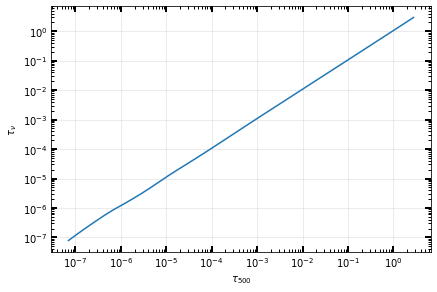

In [42]:
fig, ax = plt.subplots(figsize = (6,4), nrows = 1, ncols = 1)
fig.tight_layout(h_pad=-.5)

    
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.minorticks_on()
ax.grid(True,alpha=.3)

ax.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax.tick_params(direction='in',axis='both',which='major',length=6,width=2)#,labelsize=8)

ax.set_xscale("log")
ax.set_yscale("log")

ax.plot(t500_arr,tn)

ax.set_ylabel(r"$\tau_\nu$")
ax.set_xlabel(r"$\tau_{500}$")

# ax.legend()

output_file = "plots/22a.pdf"

fig.savefig(output_file,bbox_inches='tight')

In [43]:
n_size = 0.3
#t500_arr = np.arange(tmin,tmax+0.01*n_size,n_size)
wave_arr = np.linspace(5850,5950,500)*u.AA
freq_arr = wave_arr.to(u.Hz,equivalencies=u.spectral())
tn = tau_nu(.8,lam = wave_arr,n_size=n_size,log_bool=True)
#print(tau_nu(.995,lam = 5896*u.AA,n_size=0.4,ideal_gas=True))

[3.16227766e-08 6.30957344e-08 1.25892541e-07 2.51188643e-07
 5.01187234e-07 1.00000000e-06 1.99526231e-06 3.98107171e-06
 7.94328235e-06 1.58489319e-05 3.16227766e-05 6.30957344e-05
 1.25892541e-04 2.51188643e-04 5.01187234e-04 1.00000000e-03
 1.99526231e-03 3.98107171e-03 7.94328235e-03 1.58489319e-02
 3.16227766e-02 6.30957344e-02 1.25892541e-01 2.51188643e-01
 5.01187234e-01]


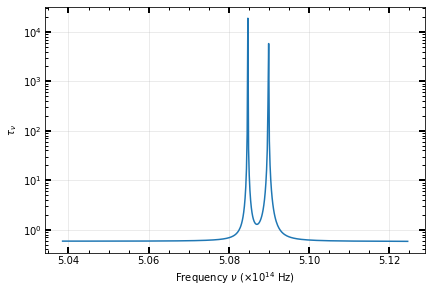

In [44]:
fig, ax = plt.subplots(figsize = (6,4), nrows = 1, ncols = 1)
fig.tight_layout(h_pad=-.5)

    
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.minorticks_on()
ax.grid(True,alpha=.3)

ax.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax.tick_params(direction='in',axis='both',which='major',length=6,width=2)#,labelsize=8)

#ax.set_xscale("log")
ax.set_yscale("log")

ax.plot(freq_arr/10**14,tn)

ax.set_ylabel(r"$\tau_\nu$")
ax.set_xlabel(r"Frequency $\nu$ ($\times 10^{14}~$Hz)")

# ax.legend()

output_file = "plots/22b.pdf"

fig.savefig(output_file,bbox_inches='tight')

In [20]:
params = t500_parameters(0)
params["T"].to_numpy()

array([447000.])

In [21]:
def back(a = 5, **kwargs):
    print(a)
    for arg in kwargs.values():
        print(arg)
    #print(result)
    forward(a=a, **kwargs)
def forward(a=2, b = 1):
    print(a)
    print(b)
    

In [22]:
back(a=4,b=2)

4
2
4
2
